## Multiple Linear Regression:
Multiple Linear Regression (MLR) -- a statistical technique  predicts a dependent variable using two or more independent variables.
Multiple Linear Regression (MLR) is a statistical method used to model the relationship between a dependent variable (target) and two or more independent variables (features). It extends simple linear regression by incorporating multiple predictors, allowing for a more comprehensive analysis of how different factors influence the target.

## Multiple Linear Regression: Crop Yield Prediction 

   Temperature    Rainfall  Soil_Quality  Crop_Yield
0    27.483571  127.987109      5.987233  -27.502848
1    24.308678  118.492674      6.783222  -16.403928
2    28.238443  101.192607      5.811370   -1.077871
3    32.615149   87.061264      6.538058   33.420996
4    23.829233  113.964466      4.159578   -3.097513
Mean Squared Error: 107.52
Coefficients: [ 1.18161345 -0.44212743  1.22873497]
Intercept: 6.466860545711796


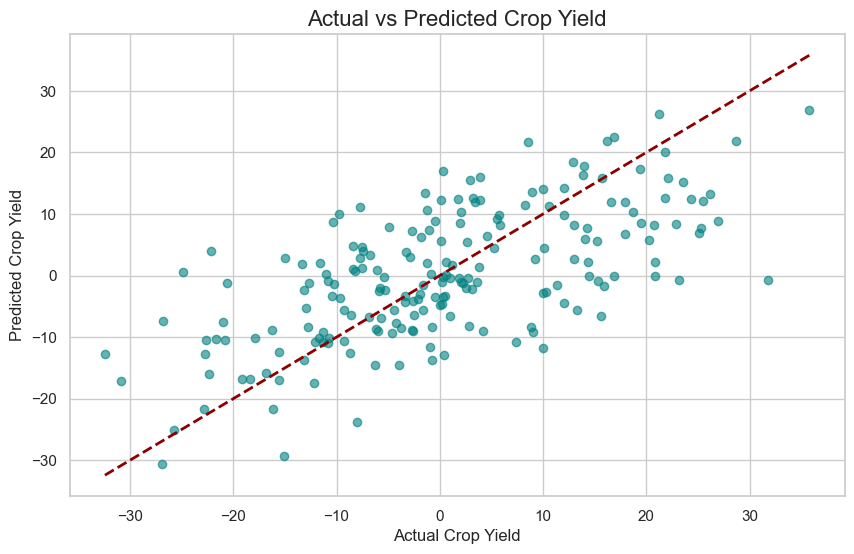

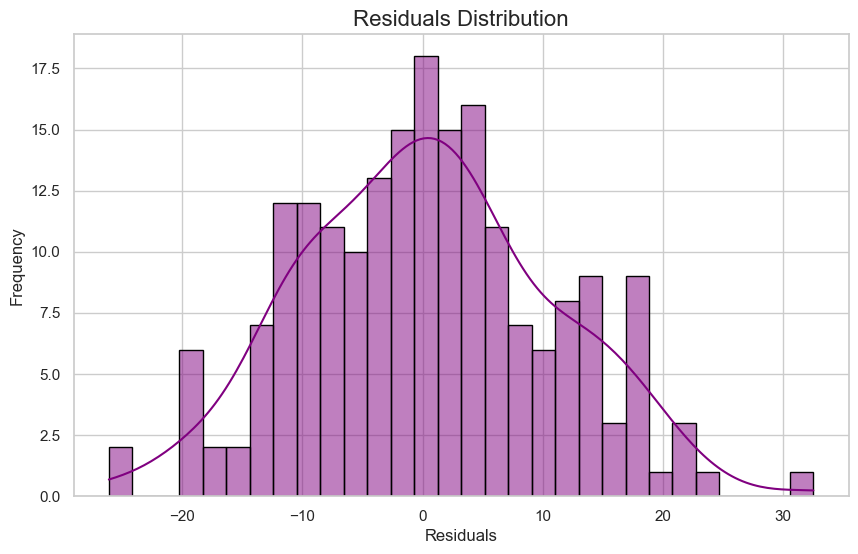

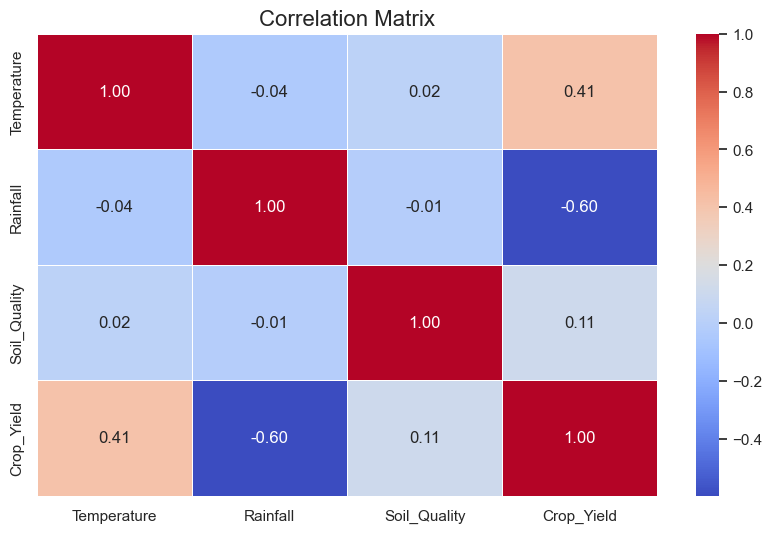

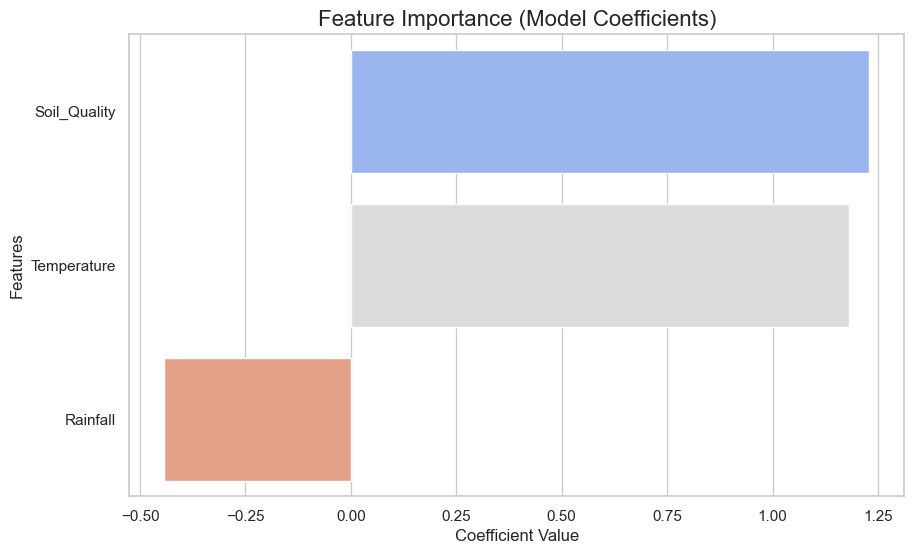

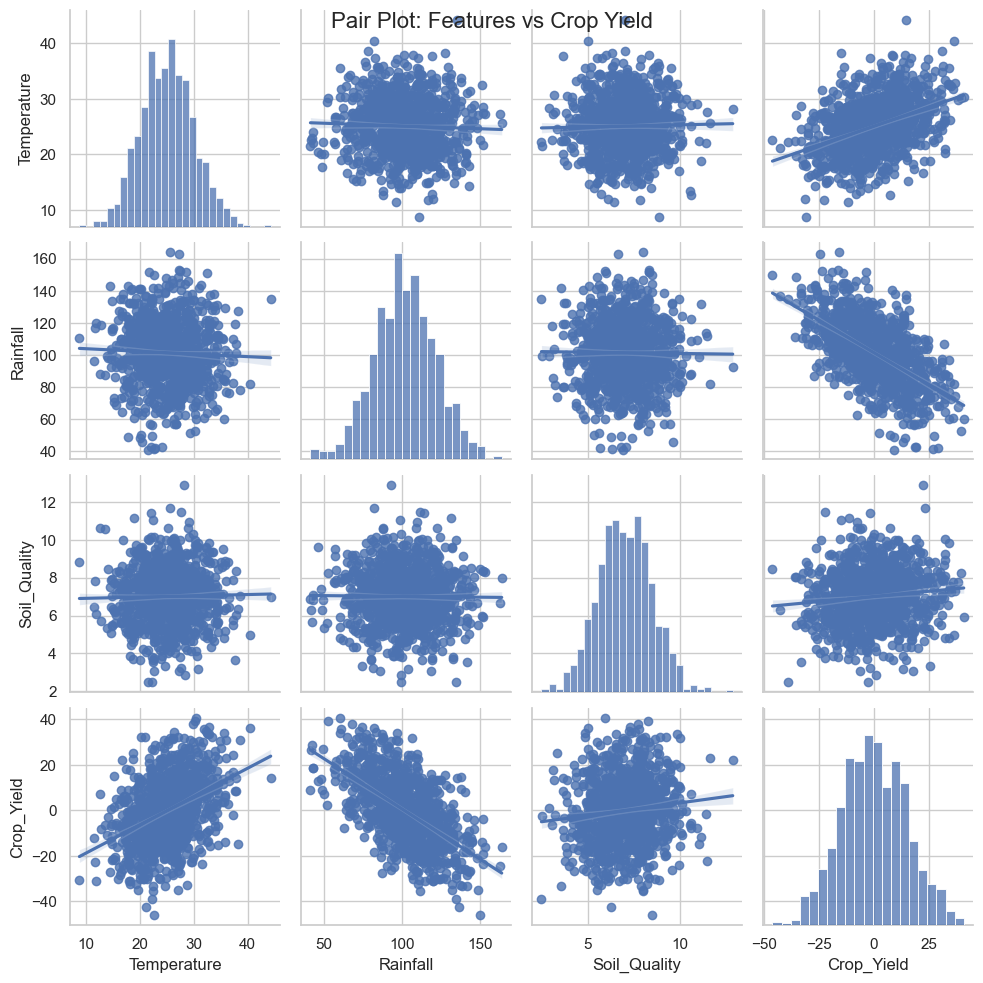

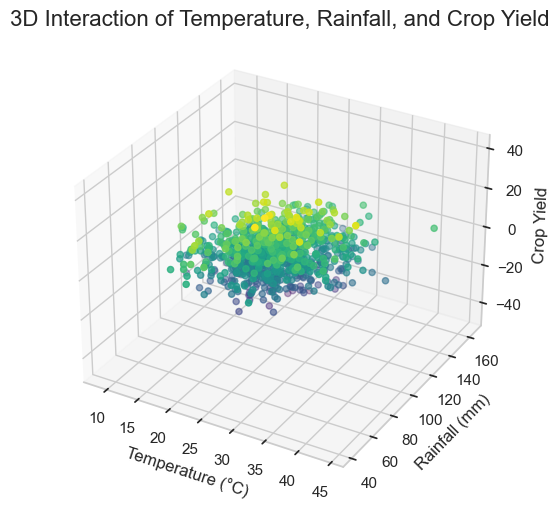

<Figure size 1000x600 with 0 Axes>

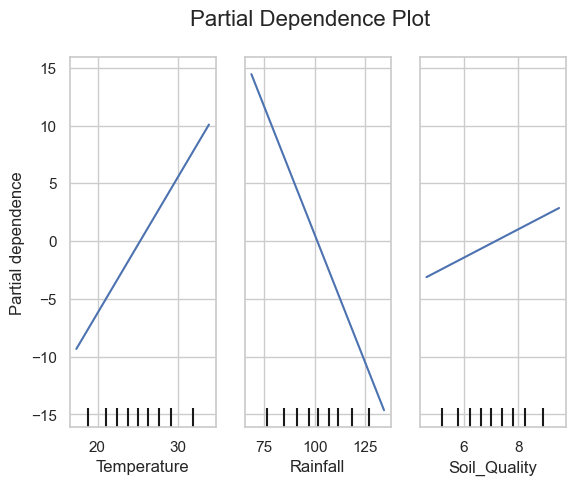

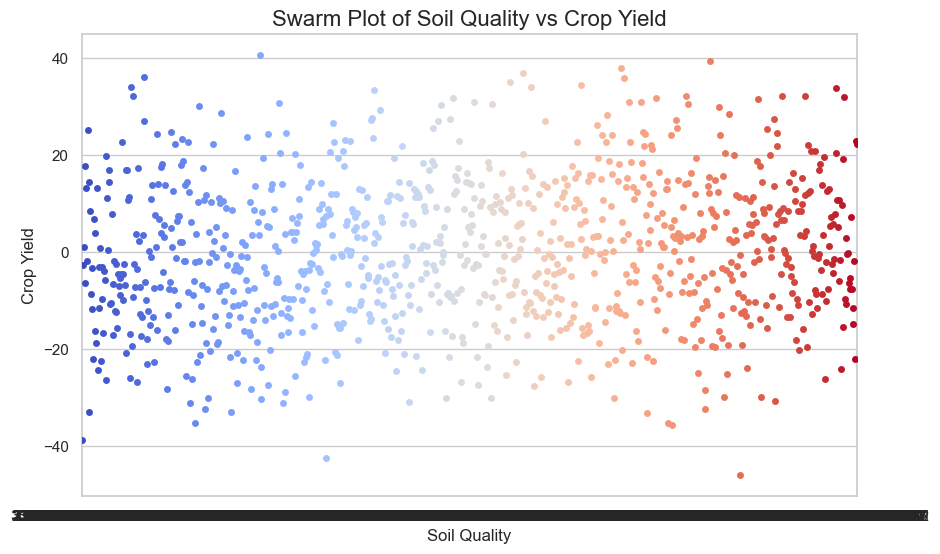

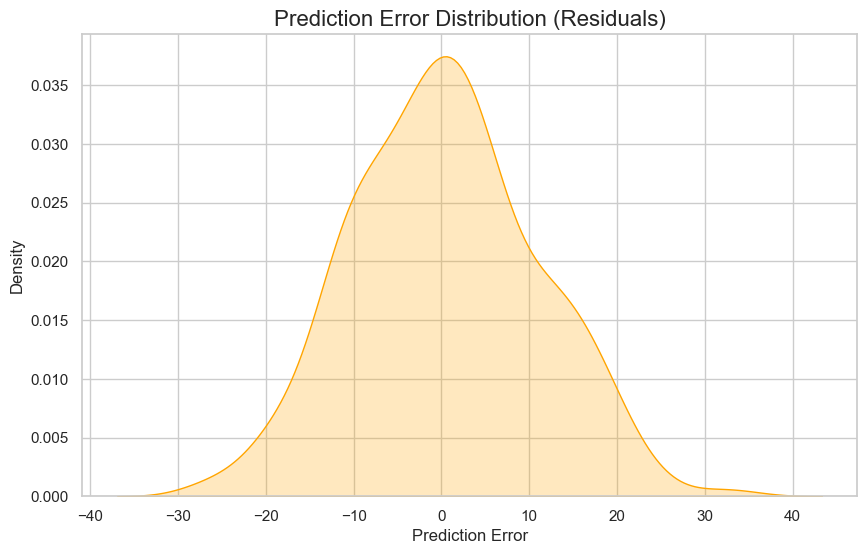

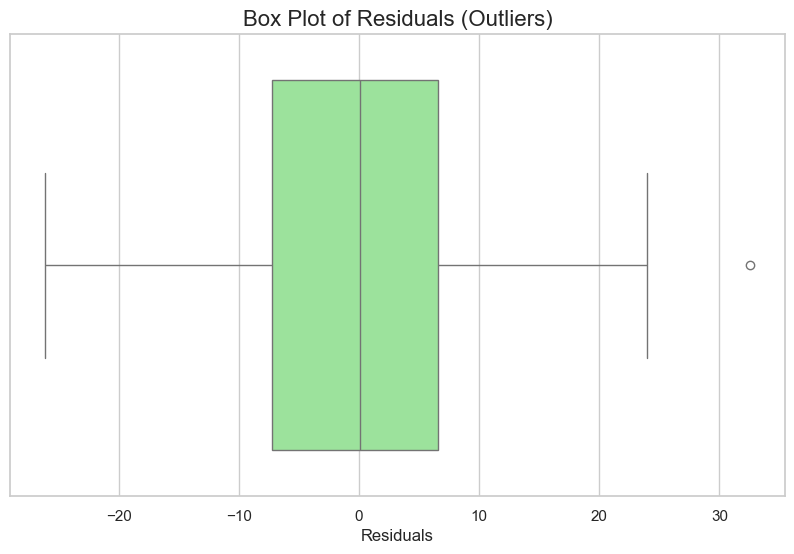


Model Interpretation:

1. Mean Squared Error (MSE): 107.52
   - The model has an average deviation of approximately 10.37 units from the actual crop yield.

2. Model Coefficients:
   - Temperature Coefficient: 1.18, meaning a 1°C increase in temperature results in a 1.18 unit increase in crop yield.
   - Rainfall Coefficient: -0.44, meaning a 1mm increase in rainfall results in a -0.44 unit decrease in crop yield.
   - Soil Quality Coefficient: 1.23, meaning a 1 unit increase in soil quality results in a 1.23 unit increase in crop yield.

3. Key Insights:
   - Temperature positively impacts crop yield (positive coefficient).
   - Rainfall negatively impacts crop yield (negative coefficient).
   - Soil Quality positively impacts crop yield (positive coefficient).

4. Model Evaluation:
   - The residuals plot shows a relatively normal distribution, indicating that the model is well-fitted to the data.
   - The Mean Squared Error (MSE) indicates the model’s prediction error; the lower th

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay  # Corrected import
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set a random seed for reproducibility
np.random.seed(42)

# 1. Generate Synthetic Data (Crop Yield Prediction)
n_samples = 1000  # Number of samples

# Generate features: Temperature (°C), Rainfall (mm), and Soil Quality (1-10 scale)
temperature = np.random.normal(25, 5, n_samples)  # Average temp: 25°C, stddev: 5
rainfall = np.random.normal(100, 20, n_samples)   # Average rainfall: 100mm, stddev: 20
soil_quality = np.random.normal(7, 1.5, n_samples)  # Soil quality (1-10 scale)

# Crop yield influenced by temperature, rainfall, and soil quality
crop_yield = 5 + 1.2 * temperature - 0.4 * rainfall + 0.8 * soil_quality + np.random.normal(0, 10, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Soil_Quality': soil_quality,
    'Crop_Yield': crop_yield
})

# Show the first few rows of data
print(data.head())

# Check for missing values
if data.isnull().sum().any():
    print("Missing values detected, dropping rows with NaN values.")
    data = data.dropna()

# 2. Prepare the features and target
X = data[['Temperature', 'Rainfall', 'Soil_Quality']]  # Features
y = data['Crop_Yield']  # Target

# 3. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = model.predict(X_test)

# 6. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 7. Model Coefficients and Intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# 8. Visualizations

# Set the Seaborn style for better visuals
sns.set(style="whitegrid")

# 1. Actual vs Predicted Crop Yield (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'darkred', lw=2, linestyle='--')
plt.title('Actual vs Predicted Crop Yield', fontsize=16)
plt.xlabel('Actual Crop Yield', fontsize=12)
plt.ylabel('Predicted Crop Yield', fontsize=12)
plt.grid(True)
plt.show()

# 2. Residuals Plot (Distribution of the residuals)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30, edgecolor='black')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 3. Correlation Matrix Heatmap
correlation = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# 4. Feature Importance (Bar plot of coefficients)
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance (Model Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# 5. Pair Plot (Visualizing relationships between all features)
sns.pairplot(data[['Temperature', 'Rainfall', 'Soil_Quality', 'Crop_Yield']], kind='reg')
plt.suptitle('Pair Plot: Features vs Crop Yield', fontsize=16)
plt.show()

# 6. 3D Plot (Interaction of Temperature, Rainfall, and Crop Yield)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Temperature'], data['Rainfall'], data['Crop_Yield'], c=data['Crop_Yield'], cmap='viridis')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Rainfall (mm)')
ax.set_zlabel('Crop Yield')
plt.title('3D Interaction of Temperature, Rainfall, and Crop Yield', fontsize=16)
plt.show()

# 7. Partial Dependence Plot (Impact of each feature on crop yield)
plt.figure(figsize=(10, 6))
# The new method to plot partial dependence in sklearn >= 1.0
PartialDependenceDisplay.from_estimator(model, X_train, features=['Temperature', 'Rainfall', 'Soil_Quality'])
plt.suptitle('Partial Dependence Plot', fontsize=16)
plt.show()

# 8. Swarm Plot (Distribution of Crop Yield)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Soil_Quality', y='Crop_Yield', data=data, palette='coolwarm')
plt.title('Swarm Plot of Soil Quality vs Crop Yield', fontsize=16)
plt.xlabel('Soil Quality', fontsize=12)
plt.ylabel('Crop Yield', fontsize=12)
plt.show()

# 9. Prediction Error Distribution (Residuals)
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, shade=True, color='orange')
plt.title('Prediction Error Distribution (Residuals)', fontsize=16)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

# 10. Box Plot (Residuals for Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=residuals, color='lightgreen')  # Fixed to pass 'x=residuals'
plt.title('Box Plot of Residuals (Outliers)', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.show()


# Model Interpretation
interpretation = f"""
Model Interpretation:

1. Mean Squared Error (MSE): {mse:.2f}
   - The model has an average deviation of approximately {np.sqrt(mse):.2f} units from the actual crop yield.

2. Model Coefficients:
   - Temperature Coefficient: {model.coef_[0]:.2f}, meaning a 1°C increase in temperature results in a {model.coef_[0]:.2f} unit increase in crop yield.
   - Rainfall Coefficient: {model.coef_[1]:.2f}, meaning a 1mm increase in rainfall results in a {model.coef_[1]:.2f} unit decrease in crop yield.
   - Soil Quality Coefficient: {model.coef_[2]:.2f}, meaning a 1 unit increase in soil quality results in a {model.coef_[2]:.2f} unit increase in crop yield.

3. Key Insights:
   - Temperature positively impacts crop yield (positive coefficient).
   - Rainfall negatively impacts crop yield (negative coefficient).
   - Soil Quality positively impacts crop yield (positive coefficient).

4. Model Evaluation:
   - The residuals plot shows a relatively normal distribution, indicating that the model is well-fitted to the data.
   - The Mean Squared Error (MSE) indicates the model’s prediction error; the lower the value, the better the model.

5. Limitations:
   - The model assumes linear relationships, which may not always be the case in real-world data.
   - Further improvements could involve more complex models like polynomial regression, or additional variables to capture more factors influencing crop yield.

Conclusion:
The multiple linear regression model provides a good approximation of crop yield based on temperature, rainfall, and soil quality. However, further refinement and inclusion of more variables would likely improve its accuracy.
"""

# Print the interpretation
print(interpretation)
